# Project - House Prices Prediction

### Notebook 2 of 3

1. Data Importing and Cleaning (This Notebook)
2. **Exploratory Data Analysis and Feature Engineering**
3. Model Training, Evaluation and Implementation

In [1]:
#Import libraries for data cleaning and exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

sns.set_theme()

In [2]:
# Import Datasets

house_train_df_cleaned = pd.read_csv("datasets/train_cleaned_1.csv")
house_test_df_cleaned = pd.read_csv("datasets/test_cleaned_1.csv")

In [3]:
house_train_df_cleaned.isnull().sum().sort_values(ascending=False)

Id              0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
Functional      0
               ..
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
SalePrice       0
Length: 79, dtype: int64

# Exploratory Data Analysis (EDA)

## Variables Summary Analysis

In [4]:
# Number of categorical columns
len(house_train_df_cleaned.select_dtypes(include='object').columns)

42

In [5]:
# Number of Numerical columns
len(house_train_df_cleaned.select_dtypes(exclude='object').columns)

37

There are 42 categorical variables and 37 numerical variable (Inclusive of Response Variable Sales Price)

In [6]:
house_train_summary = house_train_df_cleaned.describe(include='all').T

In [7]:
# Summary data for variables
house_train_summary

count unique  top  freq              mean              std  \
Id           2051.0    NaN  NaN   NaN       1474.033642       843.980841   
PID          2051.0    NaN  NaN   NaN  713590006.091663  188691837.88533   
MS SubClass  2051.0    NaN  NaN   NaN         57.008776        42.824223   
MS Zoning      2051      7   RL  1598               NaN              NaN   
Lot Area     2051.0    NaN  NaN   NaN      10065.208191      6742.488909   
...             ...    ...  ...   ...               ...              ...   
Misc Val     2051.0    NaN  NaN   NaN         51.574354       573.393985   
Mo Sold      2051.0    NaN  NaN   NaN          6.219893         2.744736   
Yr Sold      2051.0    NaN  NaN   NaN       2007.775719         1.312014   
Sale Type      2051      9  WD   1781               NaN              NaN   
SalePrice    2051.0    NaN  NaN   NaN     181469.701609     79258.659352   

                     min          25%          50%          75%          max  
Id                   1.0        753.5       1486.0       2198.0       2930.0  
PID          526301100.0  528458140.0  535453200.0  907180080.0  924152030.0  
MS SubClass         20.0         20.0         50.0         70.0        190.0  
MS Zoning            NaN          NaN          NaN          NaN          NaN  
Lot Area          1300.0       7500.0       9430.0      11513.5     159000.0  
...                  ...          ...          ...          ...          ...  
Misc Val             0.0          0.0          0.0          0.0      17000.0  
Mo Sold              1.0          4.0          6.0          8.0         12.0  
Yr Sold           2006.0       2007.0       2008.0       2009.0       2010.0  
Sale Type            NaN          NaN          NaN          NaN          NaN  
SalePrice        12789.0     129825.0     162500.0     214000.0     611657.0  

[79 rows x 11 columns]

In [8]:
# Find all categorical columns with more than 80% of data takes 1 value
low_variance_cols = house_train_summary[house_train_summary['freq'] > 1700]

Text(0.5, 1.0, 'Low Variance categorical features')

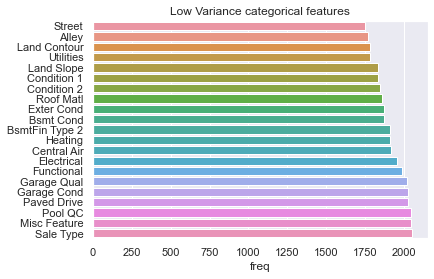

In [9]:
sns.barplot(data=low_variance_cols.sort_values('freq'), x='freq', y=low_variance_cols.index)
plt.title("Low Variance categorical features")

21 of the categorical variables = 80% of the data is 1 value

Find Potential variables with high correlation (Multi-collinearity)

In [10]:
# Corr matrix excluding Sale Price
corr_matrix = house_train_df_cleaned.drop(columns='SalePrice').corr()
# Select correlations greater than 0.5
high_corr_mat = corr_matrix[abs(corr_matrix) >= 0.5]

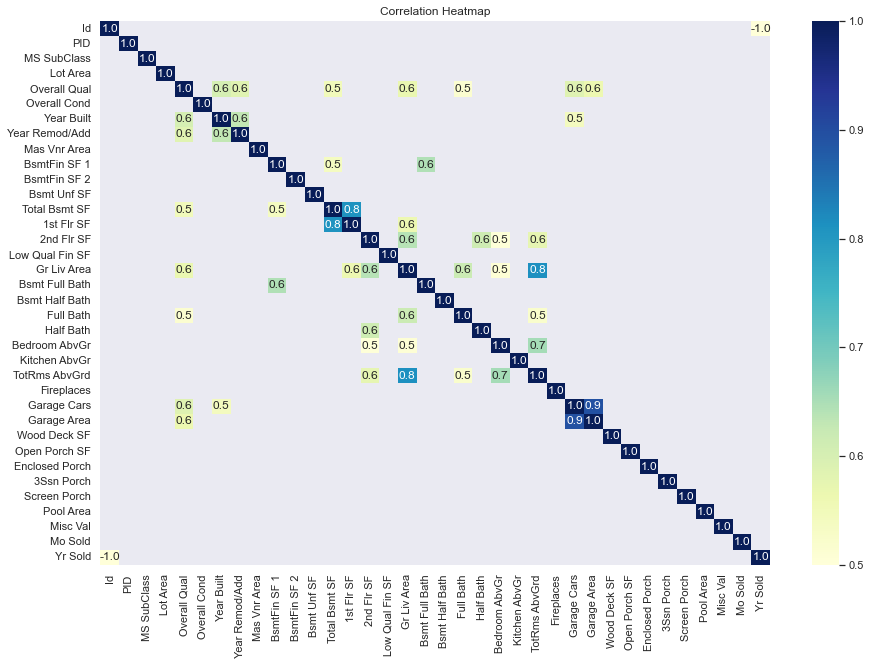

In [11]:
# Heatmap showing the high correlation values
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='YlGnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

Summary

- Overall Quality is correlated with many other columns
- Year Built and year Remodeled are similar - year built also similar to overall quality and garage cars
- A number variables measuring the SF of different areas are correlated with each other. They are also correlated with the number of bathroom/room (This is logical)

Possible Solutions
- Some Features can be combined together
- Drop some features

## House Sale Price - Target Variable

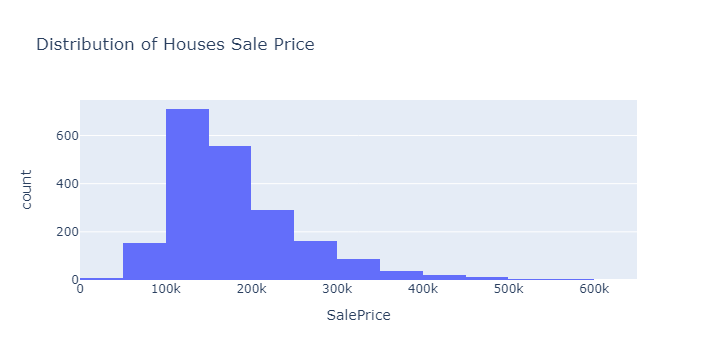

In [12]:
fig = px.histogram(house_train_df_cleaned, x="SalePrice",
                  nbins=20,
                  title="Distribution of Houses Sale Price")
fig.show()

In [13]:
house_train_df_cleaned['SalePrice'].sort_values().head(3)

1628    12789
183     13100
1309    34900
Name: SalePrice, dtype: int64

In [14]:
house_train_df_cleaned['SalePrice'].sort_values().tail(3)

1692    584500
1964    591587
1671    611657
Name: SalePrice, dtype: int64

In [15]:
house_train_df_cleaned['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Summary of findings of house prices in Ames:
1. The average Sale price of houses is \\$181,470
2. 50\% of the houses cost between \\$130,000 and \\$214,000
3. The Houses Sale Price have a right skewed distribution - some houses cost much more (right tail), causing the mean sale price to be higher than the median sale price

## Feature Exploration

### 1. Quality and Condition variables

Overall

Text(0.5, 1.0, 'Overall Condition')

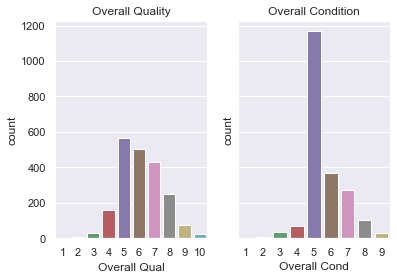

In [16]:
fig, ax = plt.subplots(1,2, sharey=True)

sns.countplot(x = house_train_df_cleaned['Overall Qual'], ax=ax[0])
ax[0].set_title("Overall Quality")
sns.countplot(x = house_train_df_cleaned['Overall Cond'], ax=ax[1])
ax[1].set_title("Overall Condition")

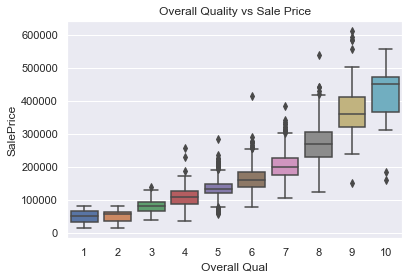

In [17]:
sns.boxplot(data = house_train_df_cleaned, x="Overall Qual", y="SalePrice")
plt.title("Overall Quality vs Sale Price")
plt.show()

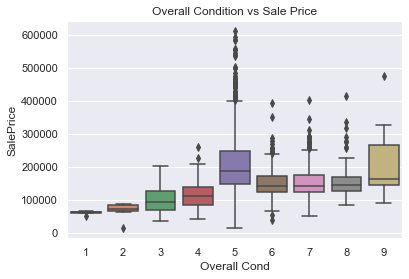

In [18]:
sns.boxplot(data = house_train_df_cleaned, x="Overall Cond", y="SalePrice")
plt.title("Overall Condition vs Sale Price")
plt.show()

External

Text(0.5, 1.0, 'External Condition')

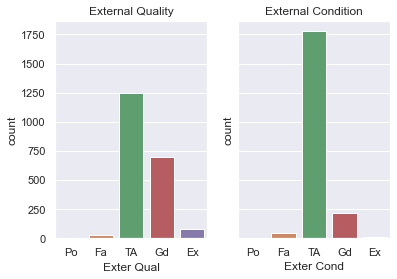

In [19]:
fig, ax = plt.subplots(1,2, sharey=True)

sns.countplot(x = house_train_df_cleaned['Exter Qual'], ax=ax[0], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[0].set_title("External Quality")
sns.countplot(x = house_train_df_cleaned['Exter Cond'], ax=ax[1], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[1].set_title("External Condition")

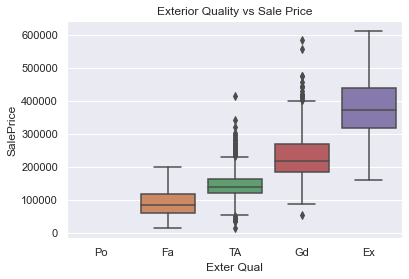

In [20]:
sns.boxplot(data = house_train_df_cleaned, x="Exter Qual", y="SalePrice", order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Exterior Quality vs Sale Price")
plt.show()

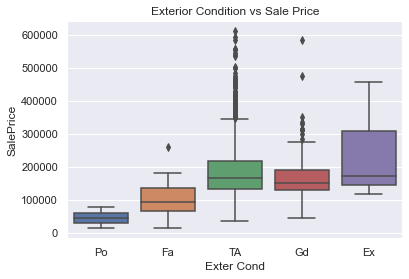

In [21]:
sns.boxplot(data = house_train_df_cleaned, x="Exter Cond", y="SalePrice", order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Exterior Condition vs Sale Price")
plt.show()

Basement

Text(0.5, 1.0, 'Basement Condition')

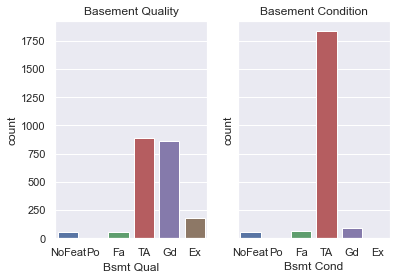

In [22]:
fig, ax = plt.subplots(1,2, sharey=True)

sns.countplot(x = house_train_df_cleaned['Bsmt Qual'], ax=ax[0], order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[0].set_title("Basement Quality")
sns.countplot(x = house_train_df_cleaned['Bsmt Cond'], ax=ax[1], order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[1].set_title("Basement Condition")

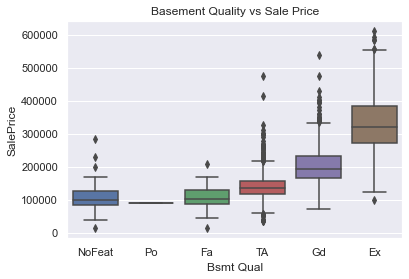

In [23]:
sns.boxplot(data = house_train_df_cleaned, x="Bsmt Qual", y="SalePrice", order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Basement Quality vs Sale Price")
plt.show()

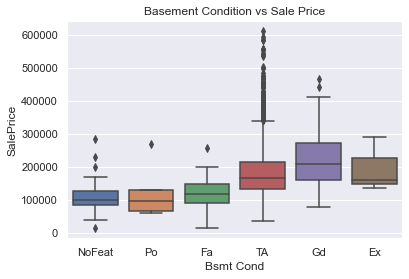

In [24]:
sns.boxplot(data = house_train_df_cleaned, x="Bsmt Cond", y="SalePrice", order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Basement Condition vs Sale Price")
plt.show()

Observation 1 - There are many Categorical Columns with Quality and Condition of a certain aspect of the house and they seem quite similar in terms of distribution - we might be able to combine them together. These ordinal variables do indicate some relationship between Sale price and the Qual/Condition

Kitchen quality

Text(0.5, 1.0, 'Kitchen Quality')

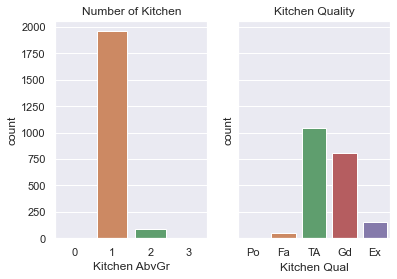

In [25]:
fig, ax = plt.subplots(1,2, sharey=True)

sns.countplot(x = house_train_df_cleaned['Kitchen AbvGr'], ax=ax[0])
ax[0].set_title("Number of Kitchen")
sns.countplot(x = house_train_df_cleaned['Kitchen Qual'], ax=ax[1], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[1].set_title("Kitchen Quality")

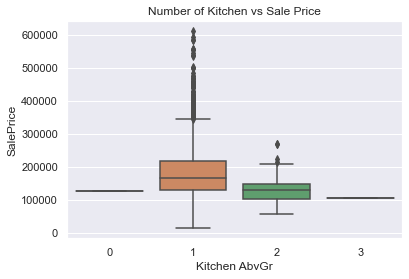

In [26]:
sns.boxplot(data = house_train_df_cleaned, x="Kitchen AbvGr", y="SalePrice")
plt.title("Number of Kitchen vs Sale Price")
plt.show()

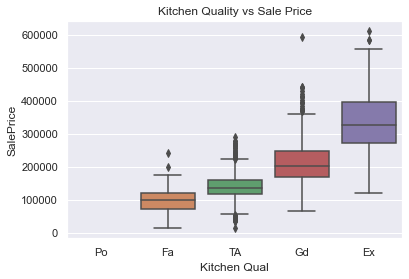

In [27]:
sns.boxplot(data = house_train_df_cleaned, x="Kitchen Qual", y="SalePrice", order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Kitchen Quality vs Sale Price")
plt.show()

fireplace quality

Text(0.5, 1.0, 'Fireplace Quality')

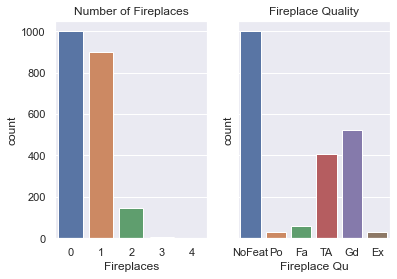

In [28]:
fig, ax = plt.subplots(1,2, sharey=True)

sns.countplot(x = house_train_df_cleaned['Fireplaces'], ax=ax[0])
ax[0].set_title("Number of Fireplaces")
sns.countplot(x = house_train_df_cleaned['Fireplace Qu'], ax=ax[1], order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
ax[1].set_title("Fireplace Quality")

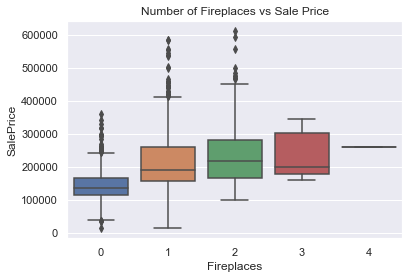

In [29]:
sns.boxplot(data = house_train_df_cleaned, x="Fireplaces", y="SalePrice")
plt.title("Number of Fireplaces vs Sale Price")
plt.show()

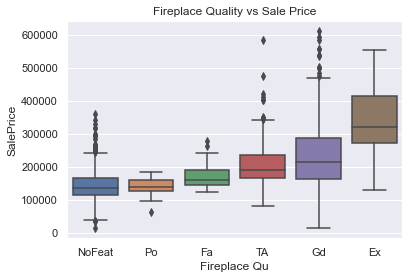

In [30]:
sns.boxplot(data = house_train_df_cleaned, x="Fireplace Qu", y="SalePrice", order=['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Fireplace Quality vs Sale Price")
plt.show()

Observation 2 - we can combine Kitchen/Fireplace and Quality. There also seems to be an ordered relationship between the ordinal variables and Sale Price.

### Numeric variables with high correlation to Sale Price

Text(0.5, 1.0, 'Correlation with Sale Price')

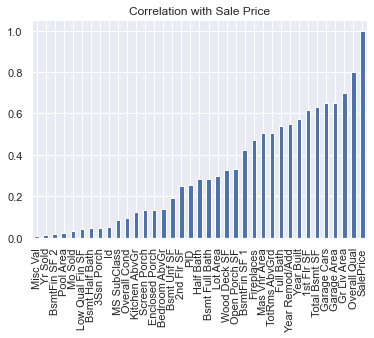

In [31]:
saleprice_corr = house_train_df_cleaned.corr()['SalePrice']
saleprice_corr.apply(abs).sort_values().plot(kind='bar')
plt.title("Correlation with Sale Price")

Variables with high correlation to SalePrice

In [32]:
high_corr_variables = house_train_df_cleaned.corr()['SalePrice'][(house_train_df_cleaned.corr()['SalePrice'] > 0.5) | (house_train_df_cleaned.corr()['SalePrice'] < -0.5)]

In [33]:
high_corr_variables = high_corr_variables.sort_values()

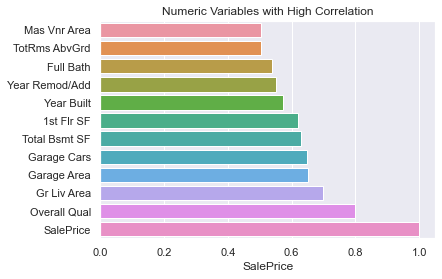

In [34]:
sns.barplot(y=high_corr_variables.index, x=high_corr_variables)
plt.title("Numeric Variables with High Correlation")
plt.show()

These are variables that we might want to include in our model

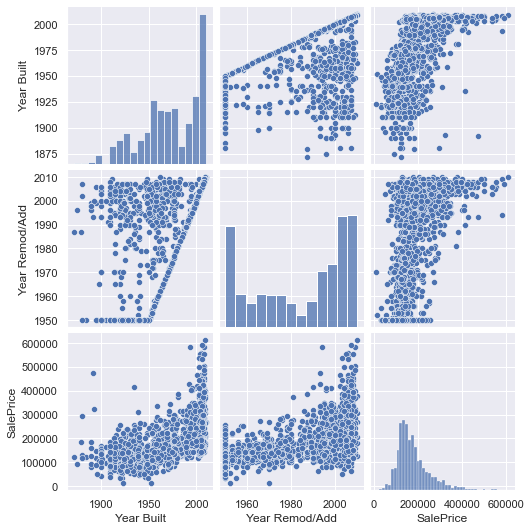

In [35]:
sns.pairplot(house_train_df_cleaned[['Year Built', 'Year Remod/Add', 'SalePrice']])

Findings - It might be better to exclude one of the year columns. Alternatively, we can create a new variable for house age.

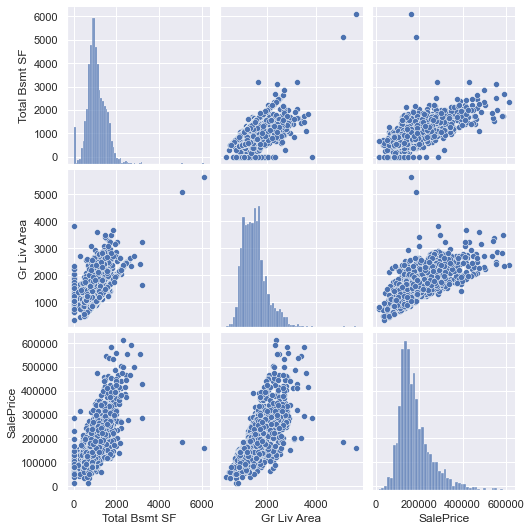

In [36]:
sns.pairplot(house_train_df_cleaned[['Total Bsmt SF', 'Gr Liv Area', 'SalePrice']])

Findings - Since both features seems useful but correlated to each other - we can add them together to get the total square feet of the house instead

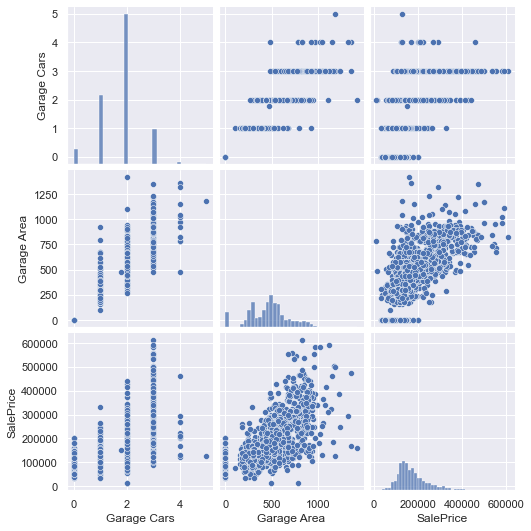

In [37]:
sns.pairplot(house_train_df_cleaned[['Garage Cars', 'Garage Area', 'SalePrice']])

Since both garage car and garage area both measures the size of the garage, we can drop 1 of them - drop garage car

### Categorical Variables

**Ordinal Variables**

Basement Type

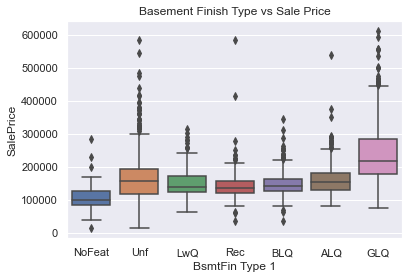

In [38]:
sns.boxplot(data = house_train_df_cleaned, x="BsmtFin Type 1", y="SalePrice", order=['NoFeat', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
plt.title("Basement Finish Type vs Sale Price")
plt.show()

Lot Shape

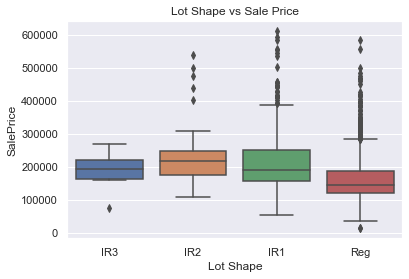

In [39]:
sns.boxplot(data = house_train_df_cleaned, x="Lot Shape", y="SalePrice", order=['IR3', 'IR2', 'IR1', 'Reg'])
plt.title("Lot Shape vs Sale Price")
plt.show()

Basement Exposure

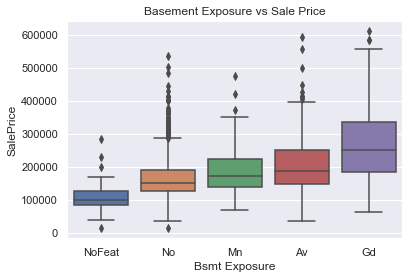

In [40]:
sns.boxplot(data = house_train_df_cleaned, x="Bsmt Exposure", y="SalePrice", order=['NoFeat', 'No', 'Mn', 'Av', 'Gd'])
plt.title("Basement Exposure vs Sale Price")
plt.show()

Heating QC

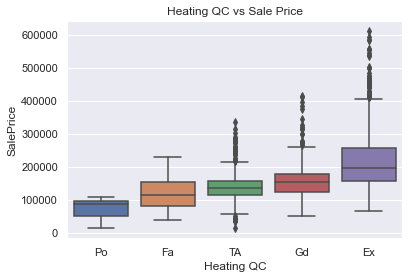

In [41]:
sns.boxplot(data = house_train_df_cleaned, x="Heating QC", y="SalePrice", order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title("Heating QC vs Sale Price")
plt.show()

Fence

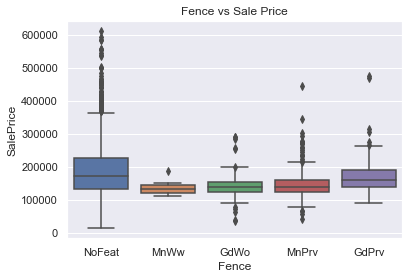

In [42]:
sns.boxplot(data = house_train_df_cleaned, x="Fence", y="SalePrice", order=['NoFeat', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])
plt.title("Fence vs Sale Price")
plt.show()

Most of the ordinal variables seem to indicate a relationship with Sale Price in the order of their ranking. For two columns: they do not seem to suggest much variability.
- Lot Shape - surprisingly, regular has the lowest median. They all seem to have a median and IQR within the same range. 
- Fence - They all seem to have a median and IQR within the same range. 

**Nominal Categorical Variables**

MS SubClass

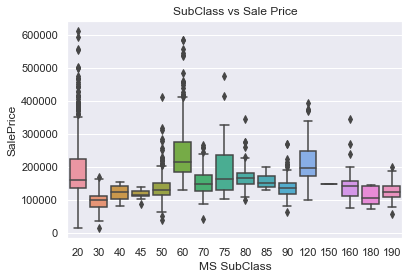

In [43]:
sns.boxplot(data = house_train_df_cleaned, x="MS SubClass", y="SalePrice")
plt.title("SubClass vs Sale Price")
plt.show()

MS Zoning

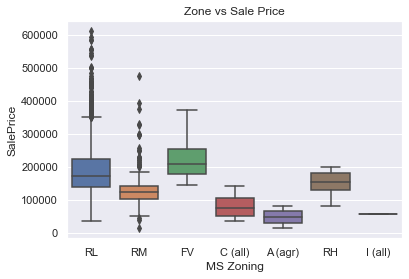

In [44]:
sns.boxplot(data = house_train_df_cleaned, x="MS Zoning", y="SalePrice")
plt.title("Zone vs Sale Price")
plt.show()

Lot Config

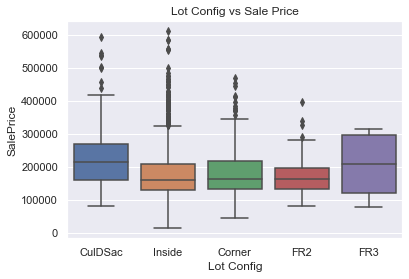

In [45]:
sns.boxplot(data = house_train_df_cleaned, x="Lot Config", y="SalePrice")
plt.title("Lot Config vs Sale Price")
plt.show()

Neighborhood

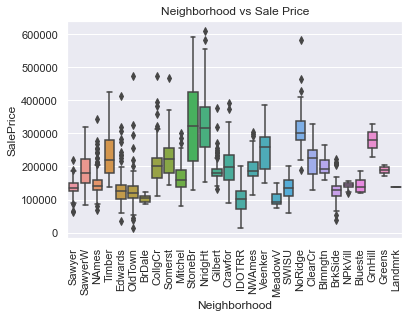

In [46]:
sns.boxplot(data = house_train_df_cleaned, x="Neighborhood", y="SalePrice")
plt.title("Neighborhood vs Sale Price")
plt.xticks(rotation=90)
plt.show()

Bldg Type

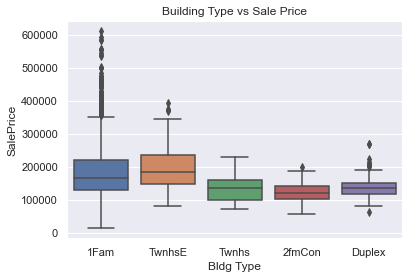

In [47]:
sns.boxplot(data = house_train_df_cleaned, x="Bldg Type", y="SalePrice")
plt.title("Building Type vs Sale Price")
plt.show()

Roof Style

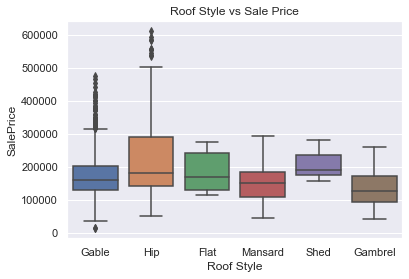

In [48]:
sns.boxplot(data = house_train_df_cleaned, x="Roof Style", y="SalePrice")
plt.title("Roof Style vs Sale Price")
plt.show()

Mas Vnr Type

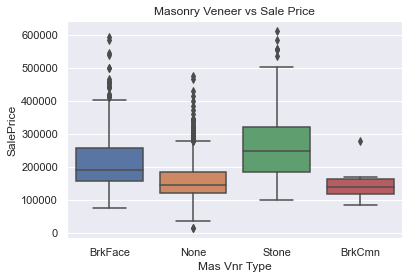

In [49]:
sns.boxplot(data = house_train_df_cleaned, x="Mas Vnr Type", y="SalePrice")
plt.title("Masonry Veneer vs Sale Price")
plt.show()

Foundation

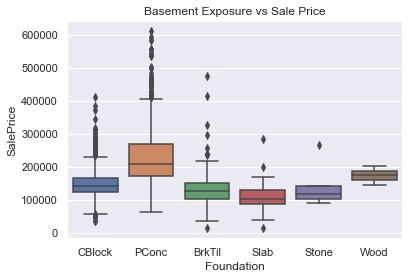

In [50]:
sns.boxplot(data = house_train_df_cleaned, x="Foundation", y="SalePrice")
plt.title("Basement Exposure vs Sale Price")
plt.show()

House Style

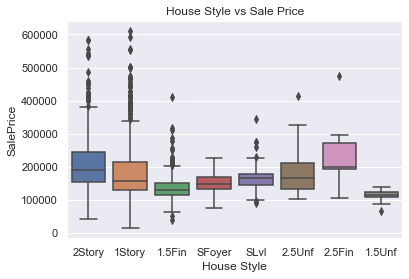

In [51]:
sns.boxplot(data = house_train_df_cleaned, x="House Style", y="SalePrice")
plt.title("House Style vs Sale Price")
plt.show()

Garage Type

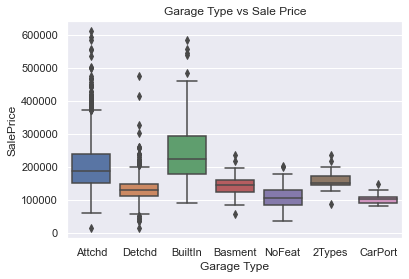

In [52]:
sns.boxplot(data = house_train_df_cleaned, x="Garage Type", y="SalePrice")
plt.title("Garage Type vs Sale Price")
plt.show()

The Nominal categorical columns seem to vary, especially Neighbour hood and Subclass. We can use them in our model

### Summary of EDA

There are 42 categorical variables and 37 numerical variable (Inclusive of the Response Variable Sales Price). 

There are 21 categorical variables with not much variance as more than 80% of the data has the same value.

Some Numerical columns are correlated with one another. Overall Quality is correlated with many other variables. Other variables that are correlated are
Year Built and Year remodeled, Garage cars and Garage area. Some of these variables would have to be dropped to avoid multicollinearity. One interesting 
finding is that many of the variables relating to SF are highly correlated with one another (as well as the number of rooms). We could possibly combine
some of these features into a new consolidated Square Feet feature.

The average Sale price of houses are around \\$181,470 and 50\% of the houses cost between \\$130,000 and \\$214,000. Sale Prices has a right skewed distribution, suggesting
that some houses are much more expensive than the rest. The top 3 houses cost around \\$600,000.

Some Categorical variables that are similar can be combined to better suit the model. For instance, the quality and condition columns for several features
are very similar in terms of distribution. Creating an interaction variable between them might be useful. Another instance is combining the quality and 
count of some of the features.

Some of the numerical columns with the highest correlation to Sales Price are Overall Quality, Above Ground Living Area, Garage Area, Total Basement Square Feet 
and year Built. These variables could be the important variables to include in our model.

Most of the ordinal categorical variables seem to indicate a relationship with Sale Price in the order of their ranking. 
For two variables: Lot Shape and fence - they do not vary much in relation to Sale Price across the category.

The Nominal categorical variables seem to vary across the categories in relation to Sales Price. This is especially so in Neighbourhood and Subclass.
Perhaps these two variables would be good predictors of house prices.



# Feature Engineering

### Drop Columns

Columns where most categorical values are the same - too little variation to be useful

* Kept columns that will be used in other feature engineering later on

In [53]:
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Street', 'Alley', 'Land Contour', 'Utilities', 
                                                              'Land Slope', 'Condition 1', 'Condition 2', 
                                                              'Roof Matl', 'Heating', 'Central Air', 
                                                              'Electrical', 'Functional', 'Paved Drive', 
                                                              'Pool QC', 'Pool Area', 'Misc Feature', 
                                                              'Sale Type'])

In [54]:
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Street', 'Alley', 'Land Contour', 'Utilities', 
                                                            'Land Slope', 'Condition 1', 'Condition 2', 
                                                            'Roof Matl', 'Heating', 'Central Air', 
                                                            'Electrical', 'Functional', 'Paved Drive', 
                                                            'Pool QC', 'Pool Area', 'Misc Feature', 
                                                            'Sale Type'])

Other columns to drop
- Id and PID - just unique identifier columns
- Garage Car - too similar to Garage Area
- Exterior 1st and Exterior 2nd - we can the other Exterior columns to judge a house exterior
- Bedroom AbvGr - Too similar to Total Room AbvGr 
- Lot Shape and Fence - these ordinal variables might not have useful explanatory power as indicated in EDA above
- Month Sold - not a useful numeric/ordinal column

In [55]:
house_train_df_cleaned = house_train_df_cleaned.drop(columns=["Id", "PID", 'Lot Shape',
                                                             "Garage Cars", "Exterior 1st",
                                                             "Exterior 2nd", 'Bedroom AbvGr',
                                                             'Fence', 'Mo Sold'])

In [56]:
house_test_df_cleaned = house_test_df_cleaned.drop(columns=["Id", "PID", 'Lot Shape',
                                                             "Garage Cars", "Exterior 1st",
                                                             "Exterior 2nd", 'Bedroom AbvGr',
                                                             'Fence', 'Mo Sold'])

## Ordinal Encoding for ordinal variables

In [57]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 53)
(878, 52)


In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
# Create list of ordinal variable columns
ordinal_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
                'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
                'Kitchen Qual', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
                'Garage Cond']

In [60]:
# unique categorical value for ordinal columns
data = []

for col in ordinal_cols:
    unique_val = list(house_train_df_cleaned[col].sort_values(ignore_index=True).unique())
    data.append(unique_val)

In [61]:
data

[['Ex', 'Fa', 'Gd', 'TA'],
 ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'NoFeat', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'NoFeat', 'Po', 'TA'],
 ['Av', 'Gd', 'Mn', 'No', 'NoFeat'],
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NoFeat', 'Rec', 'Unf'],
 ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NoFeat', 'Rec', 'Unf'],
 ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'TA'],
 ['Ex', 'Fa', 'Gd', 'NoFeat', 'Po', 'TA'],
 ['Fin', 'NoFeat', 'RFn', 'Unf'],
 ['Ex', 'Fa', 'Gd', 'NoFeat', 'Po', 'TA'],
 ['Ex', 'Fa', 'Gd', 'NoFeat', 'Po', 'TA']]

In [62]:
# Define sequence for each col

exter_qual_seq = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
exter_cond_seq = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_qual_seq = ['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_cond_seq = ['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure_seq = ['NoFeat', 'No', 'Mn', 'Av', 'Gd']
bsmtfin_type1_seq = ['NoFeat', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfin_type2_seq = ['NoFeat', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heating_qc_seq = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
kitchen_qual_seq = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
fireplace_qu_seq = ['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_fin_seq = ['NoFeat', "Unf", "RFn", 'Fin']
garage_qual_seq = ['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_cond_seq = ['NoFeat', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [63]:
# create list of list of ordinal values in sequence
ord_vals = [exter_qual_seq, exter_cond_seq, bsmt_qual_seq, bsmt_cond_seq,
            bsmt_exposure_seq, bsmtfin_type1_seq, bsmtfin_type2_seq, 
            heating_qc_seq, kitchen_qual_seq, fireplace_qu_seq,
            garage_fin_seq, garage_qual_seq, garage_cond_seq]

In [64]:
# Fit Ordinal Encoder on train dataset
ord_enc = OrdinalEncoder(categories=ord_vals)
ord_enc.fit(house_train_df_cleaned[ordinal_cols])
house_train_df_cleaned[ordinal_cols] = ord_enc.transform(house_train_df_cleaned[ordinal_cols])

In [65]:
# transform for test
house_test_df_cleaned[ordinal_cols] = ord_enc.transform(house_test_df_cleaned[ordinal_cols])

In [66]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 53)
(878, 52)


### Feature Manipulation - create new features

1. Overall housing qual/cond score - combine feature and remove original columns

Quality x Condition

In [67]:
house_train_df_cleaned[['Overall Qual', 'Overall Cond']].head()

Overall Qual  Overall Cond
0             6             8
1             7             5
2             5             7
3             5             5
4             6             8

In [68]:
house_train_df_cleaned['overall_score'] = house_train_df_cleaned['Overall Qual'] * house_train_df_cleaned['Overall Cond']
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Overall Qual', 'Overall Cond'])

In [69]:
house_test_df_cleaned['overall_score'] = house_test_df_cleaned['Overall Qual'] * house_test_df_cleaned['Overall Cond']
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Overall Qual', 'Overall Cond'])

In [70]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 52)
(878, 51)


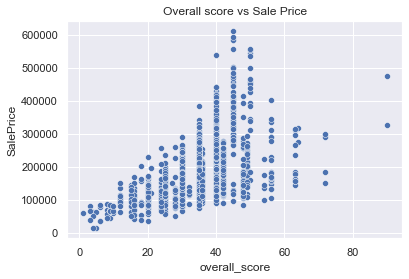

In [71]:
sns.scatterplot(x=house_train_df_cleaned['overall_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Overall score vs Sale Price")
plt.show()

2. External Score - combine and remove original

Quality x Condition

In [72]:
house_train_df_cleaned[['Exter Qual', 'Exter Cond']].head()

Exter Qual  Exter Cond
0         3.0         2.0
1         3.0         2.0
2         2.0         3.0
3         2.0         2.0
4         2.0         2.0

In [73]:
house_train_df_cleaned['exter_score'] = house_train_df_cleaned['Exter Qual'] * house_train_df_cleaned['Exter Cond']
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Exter Qual', 'Exter Cond'])

In [74]:
house_test_df_cleaned['exter_score'] = house_test_df_cleaned['Exter Qual'] * house_test_df_cleaned['Exter Cond']
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Exter Qual', 'Exter Cond'])

In [75]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 51)
(878, 50)


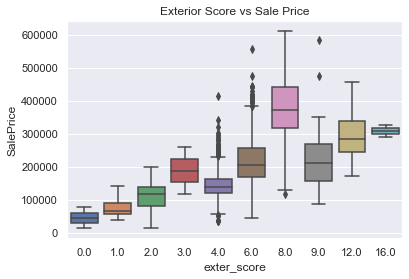

In [76]:
sns.boxplot(x=house_train_df_cleaned['exter_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Exterior Score vs Sale Price")
plt.show()

3. Basement Score - combine and remove original

Quality x Condition

In [77]:
house_train_df_cleaned[['Bsmt Qual', 'Bsmt Cond']].head()

Bsmt Qual  Bsmt Cond
0        3.0        3.0
1        4.0        3.0
2        3.0        3.0
3        4.0        3.0
4        2.0        4.0

In [78]:
house_train_df_cleaned['bsmt_score'] = house_train_df_cleaned['Bsmt Qual'] * house_train_df_cleaned['Bsmt Cond']
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Bsmt Qual', 'Bsmt Cond'])

In [79]:
house_test_df_cleaned['bsmt_score'] = house_test_df_cleaned['Bsmt Qual'] * house_test_df_cleaned['Bsmt Cond']
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Bsmt Qual', 'Bsmt Cond'])

In [80]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 50)
(878, 49)


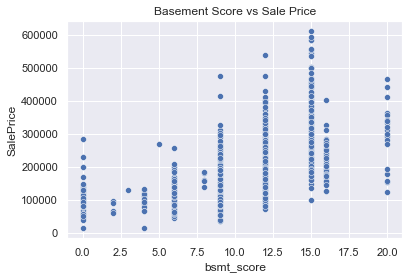

In [81]:
sns.scatterplot(x=house_train_df_cleaned['bsmt_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Basement Score vs Sale Price")
plt.show()

4. Total SF 

Total basement SF + Gr Living Area SF

In [82]:
house_train_df_cleaned['total_sf'] = house_train_df_cleaned['Total Bsmt SF'] + house_train_df_cleaned['Gr Liv Area']

In [83]:
house_test_df_cleaned['total_sf'] = house_test_df_cleaned['Total Bsmt SF'] + house_test_df_cleaned['Gr Liv Area']

In [84]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 51)
(878, 50)


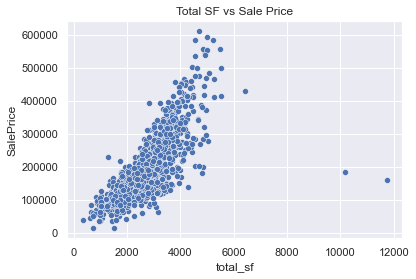

In [85]:
sns.scatterplot(x=house_train_df_cleaned['total_sf'], y=house_train_df_cleaned['SalePrice'])
plt.title("Total SF vs Sale Price")
plt.show()

5. Basement Consolidated SF

- basement Fin * basement SF

In [86]:
house_train_df_cleaned[['BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].head()

BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0             6.0         533.0             1.0           0.0        192.0   
1             6.0         637.0             1.0           0.0        276.0   
2             6.0         731.0             1.0           0.0        326.0   
3             1.0           0.0             1.0           0.0        384.0   
4             1.0           0.0             1.0           0.0        676.0   

   Total Bsmt SF  
0          725.0  
1          913.0  
2         1057.0  
3          384.0  
4          676.0

In [87]:
# basement score column

bsmt_fin_score = house_train_df_cleaned['BsmtFin Type 1'] * house_train_df_cleaned['BsmtFin SF 1']
bsmt_fin_score = bsmt_fin_score + (house_train_df_cleaned['BsmtFin Type 2'] * house_train_df_cleaned['BsmtFin SF 2'])
bsmt_fin_score = bsmt_fin_score + house_train_df_cleaned['Bsmt Unf SF']
house_train_df_cleaned["bsmt_fin_score"] = bsmt_fin_score

In [88]:
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['BsmtFin Type 1', 
                                                              'BsmtFin SF 1', 
                                                              'BsmtFin Type 2', 
                                                              'BsmtFin SF 2', 
                                                              'Bsmt Unf SF', 
                                                              'Total Bsmt SF'])

In [89]:
bsmt_fin_score_test = house_test_df_cleaned['BsmtFin Type 1'] * house_test_df_cleaned['BsmtFin SF 1']
bsmt_fin_score_test = bsmt_fin_score_test + (house_test_df_cleaned['BsmtFin Type 2'] * house_test_df_cleaned['BsmtFin SF 2'])
bsmt_fin_score_test = bsmt_fin_score_test + house_test_df_cleaned['Bsmt Unf SF']
house_test_df_cleaned["bsmt_fin_score"] = bsmt_fin_score_test

In [90]:
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['BsmtFin Type 1', 
                                                            'BsmtFin SF 1', 
                                                            'BsmtFin Type 2', 
                                                            'BsmtFin SF 2', 
                                                            'Bsmt Unf SF', 
                                                            'Total Bsmt SF'])

In [91]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 46)
(878, 45)


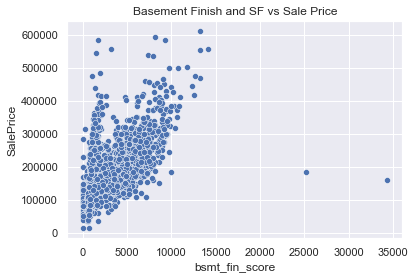

In [92]:
sns.scatterplot(x=house_train_df_cleaned['bsmt_fin_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Basement Finish and SF vs Sale Price")
plt.show()

6. Above Ground Living Area consolidated SF

Sum of SF (Low Quality SF multiply by 0.5)

In [93]:
house_train_df_cleaned[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']].head()

1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area
0         725         754                0         1479
1         913        1209                0         2122
2        1057           0                0         1057
3         744         700                0         1444
4         831         614                0         1445

In [94]:
house_train_df_cleaned['gr_liv_area_score'] = house_train_df_cleaned['1st Flr SF'] + house_train_df_cleaned['2nd Flr SF'] + (house_train_df_cleaned['Low Qual Fin SF']*0.5)
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['1st Flr SF', 
                                                              '2nd Flr SF', 
                                                              'Low Qual Fin SF',
                                                              'Gr Liv Area'])

In [95]:
house_test_df_cleaned['gr_liv_area_score'] = house_test_df_cleaned['1st Flr SF'] + house_test_df_cleaned['2nd Flr SF'] + (house_test_df_cleaned['Low Qual Fin SF']*0.5)
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['1st Flr SF', 
                                                            '2nd Flr SF', 
                                                            'Low Qual Fin SF',
                                                            'Gr Liv Area'])

In [96]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 43)
(878, 42)


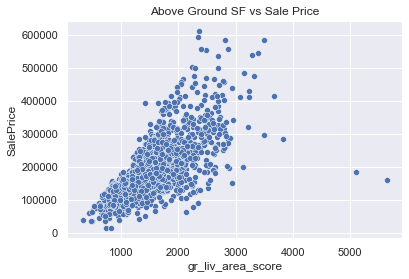

In [97]:
sns.scatterplot(x=house_train_df_cleaned['gr_liv_area_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Above Ground SF vs Sale Price")
plt.show()

7. Combine Bathroom variables

Full bath + Half bath*0.5

In [98]:
house_train_df_cleaned[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']].head()

Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath
0             0.0             0.0          2          1
1             1.0             0.0          2          1
2             1.0             0.0          1          0
3             0.0             0.0          2          1
4             0.0             0.0          2          0

In [99]:
bathroom_score = (house_train_df_cleaned['Bsmt Full Bath'] + house_train_df_cleaned['Full Bath']) + 0.5*(house_train_df_cleaned['Bsmt Half Bath'] + house_train_df_cleaned['Half Bath'])
house_train_df_cleaned['bathroom_score'] = bathroom_score

house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Bsmt Full Bath', 'Bsmt Half Bath',
                                                              'Full Bath', 'Half Bath'])

In [100]:
bathroom_score_test = (house_test_df_cleaned['Bsmt Full Bath'] + house_test_df_cleaned['Full Bath']) + 0.5*(house_test_df_cleaned['Bsmt Half Bath'] + house_test_df_cleaned['Half Bath'])
house_test_df_cleaned['bathroom_score'] = bathroom_score_test

house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Bsmt Full Bath', 'Bsmt Half Bath',
                                                            'Full Bath', 'Half Bath'])

In [101]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 40)
(878, 39)


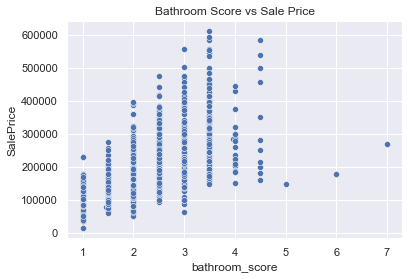

In [102]:
sns.scatterplot(x=house_train_df_cleaned['bathroom_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Bathroom Score vs Sale Price")
plt.show()

8. Kitchen Score

Number of Kitchen * Kitchen Quality

In [103]:
house_train_df_cleaned[['Kitchen AbvGr', 'Kitchen Qual']].head()

Kitchen AbvGr  Kitchen Qual
0              1           3.0
1              1           3.0
2              1           3.0
3              1           2.0
4              1           2.0

In [104]:
house_train_df_cleaned['kitchen_score'] = house_train_df_cleaned['Kitchen AbvGr'] * house_train_df_cleaned['Kitchen Qual']
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Kitchen AbvGr', 'Kitchen Qual'])

In [105]:
house_test_df_cleaned['kitchen_score'] = house_test_df_cleaned['Kitchen AbvGr'] * house_test_df_cleaned['Kitchen Qual']
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Kitchen AbvGr', 'Kitchen Qual'])

In [106]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 39)
(878, 38)


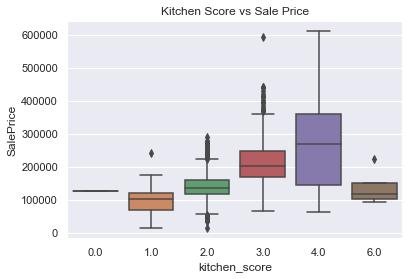

In [107]:
sns.boxplot(x=house_train_df_cleaned['kitchen_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Kitchen Score vs Sale Price")
plt.show()

9. Fireplace Score

Number of Fireplaces * Fireplace Quality

In [108]:
house_train_df_cleaned[['Fireplaces', 'Fireplace Qu']].head()

Fireplaces  Fireplace Qu
0           0           0.0
1           1           3.0
2           0           0.0
3           0           0.0
4           0           0.0

In [109]:
house_train_df_cleaned['fireplace_score'] = house_train_df_cleaned['Fireplaces'] * house_train_df_cleaned['Fireplace Qu']
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Fireplaces', 'Fireplace Qu'])

In [110]:
house_test_df_cleaned['fireplace_score'] = house_test_df_cleaned['Fireplaces'] * house_test_df_cleaned['Fireplace Qu']
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Fireplaces', 'Fireplace Qu'])

In [111]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 38)
(878, 37)


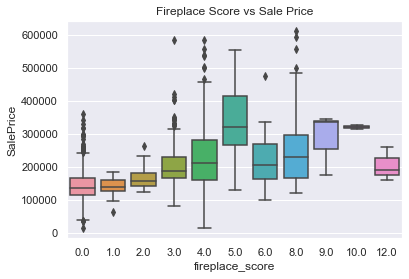

In [112]:
sns.boxplot(x=house_train_df_cleaned['fireplace_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Fireplace Score vs Sale Price")
plt.show()

10. outdoor area consolidated SF

Sum of Wood Deck, Open Porch, Enclosed Porch, 3Ssn Porch. Screen Porch SF

In [113]:
house_train_df_cleaned[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']].head()

Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch
0             0             44               0           0             0
1             0             74               0           0             0
2             0             52               0           0             0
3           100              0               0           0             0
4             0             59               0           0             0

In [114]:
house_train_df_cleaned['outdoor_area'] = house_train_df_cleaned[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']].sum(axis=1)
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'])

In [115]:
house_test_df_cleaned['outdoor_area'] = house_test_df_cleaned[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']].sum(axis=1)
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'])

In [116]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 34)
(878, 33)


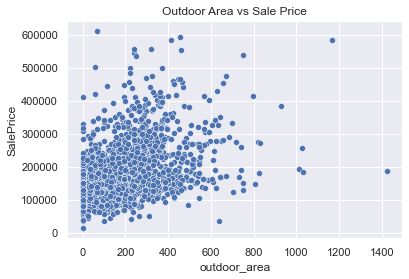

In [117]:
sns.scatterplot(x=house_train_df_cleaned['outdoor_area'], y=house_train_df_cleaned['SalePrice'])
plt.title("Outdoor Area vs Sale Price")
plt.show()

11. Garage Score

Garage Fin x Garage Qual x Garage Cond

In [118]:
house_train_df_cleaned[['Garage Finish', 'Garage Qual', 'Garage Cond']].head()

Garage Finish  Garage Qual  Garage Cond
0            2.0          3.0          3.0
1            2.0          3.0          3.0
2            1.0          3.0          3.0
3            3.0          3.0          3.0
4            1.0          3.0          3.0

In [119]:
house_train_df_cleaned['garage_score'] = house_train_df_cleaned['Garage Finish'] * house_train_df_cleaned['Garage Qual'] * house_train_df_cleaned['Garage Cond']

In [120]:
house_train_df_cleaned = house_train_df_cleaned.drop(columns=['Garage Finish', 'Garage Qual', 'Garage Cond'])

In [121]:
house_test_df_cleaned['garage_score'] = house_test_df_cleaned['Garage Finish'] * house_test_df_cleaned['Garage Qual'] * house_test_df_cleaned['Garage Cond']

In [122]:
house_test_df_cleaned = house_test_df_cleaned.drop(columns=['Garage Finish', 'Garage Qual', 'Garage Cond'])

In [123]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 32)
(878, 31)


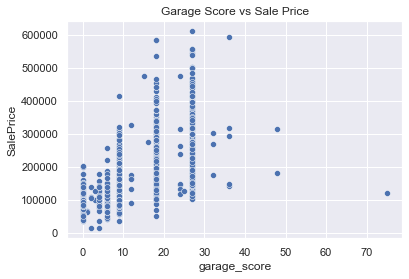

In [124]:
sns.scatterplot(x=house_train_df_cleaned['garage_score'], y=house_train_df_cleaned['SalePrice'])
plt.title("Garage Score vs Sale Price")
plt.show()

12. House Age

In [125]:
house_train_df_cleaned[['Year Built', 'Year Remod/Add', 'Yr Sold']].head()

Year Built  Year Remod/Add  Yr Sold
0        1976            2005     2010
1        1996            1997     2009
2        1953            2007     2010
3        2006            2007     2010
4        1900            1993     2010

In [126]:
house_train_df_cleaned['house_age'] = house_train_df_cleaned['Yr Sold'] - house_train_df_cleaned['Year Built'] 
house_train_df_cleaned = house_train_df_cleaned.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1)

In [127]:
house_test_df_cleaned['house_age'] = house_test_df_cleaned['Yr Sold'] - house_test_df_cleaned['Year Built'] 
house_test_df_cleaned = house_test_df_cleaned.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1)

In [128]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2051, 30)
(878, 29)


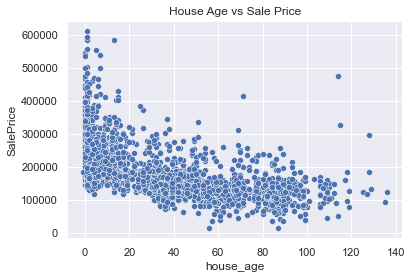

In [129]:
sns.scatterplot(x=house_train_df_cleaned['house_age'], y=house_train_df_cleaned['SalePrice'])
plt.title("House Age vs Sale Price")
plt.show()

The new created features does seem to exhibit a relationship with Sale Price. They should be useful explanatory variables for Sale Price. Most of them show a positive relationship with Sale Price. The house age shows a negative relationship with Sale Price. One interesting observation is that there are 2 datapoints showing houses with very large square feet areas but with a relatively low sale price. We will remove this two data points.

In [130]:
house_train_df_cleaned[house_train_df_cleaned['gr_liv_area_score'] > 5000]
house_train_df_cleaned.drop(index=[960, 1885], inplace=True)
house_train_df_cleaned = house_train_df_cleaned.reset_index(drop=True)

In [131]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2049, 30)
(878, 29)


### One Hot Encoding for Nominal Categorical Variables

In [132]:
# Creating list of columns to OHE

col_to_ohe = ['MS SubClass', 'MS Zoning', 'Lot Config', 'Neighborhood', 'Bldg Type', 
              'Roof Style','Mas Vnr Type', 'Foundation', 'House Style', 'Garage Type']

In [133]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2049, 30)
(878, 29)


In [134]:
# Import OHE encoder
from sklearn.preprocessing import OneHotEncoder

In [135]:
# Combined train and test for OHE imputation
combined_df_ohe = pd.concat([house_train_df_cleaned[col_to_ohe], house_test_df_cleaned[col_to_ohe]])

In [136]:
combined_df_ohe.shape

(2927, 10)

We combine the dataset to ensure all unique category are accounted for (in scenario where the value appear in test dataset but not in the train dataset and vice versa)

In [137]:
# Number of unique variables that will be created
unique_count_ohe = 0
for col in col_to_ohe:
    unique_count_ohe += combined_df_ohe[col].nunique()

In [138]:
# Number of columns that will be created
unique_count_ohe - len(col_to_ohe)

83

There should be 83 additional columns created from OHE

In [139]:
# fit and train on train dataset
ohe = OneHotEncoder(drop="first")
ohe = ohe.fit(combined_df_ohe)
transformed = ohe.transform(house_train_df_cleaned[col_to_ohe])
transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
# dataframe of OHE columns
ohe_cols_train = pd.DataFrame(transformed.toarray(), columns = ohe.get_feature_names())

In [141]:
ohe_cols_train.head()

x0_30  x0_40  x0_45  x0_50  x0_60  x0_70  x0_75  x0_80  x0_85  x0_90  ...  \
0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   x8_2.5Unf  x8_2Story  x8_SFoyer  x8_SLvl  x9_Attchd  x9_Basment  \
0        0.0        1.0        0.0      0.0        1.0         0.0   
1        0.0        1.0        0.0      0.0        1.0         0.0   
2        0.0        0.0        0.0      0.0        0.0         0.0   
3        0.0        1.0        0.0      0.0        0.0         0.0   
4        0.0        0.0        0.0      0.0        0.0         0.0   

   x9_BuiltIn  x9_CarPort  x9_Detchd  x9_NoFeat  
0         0.0         0.0        0.0        0.0  
1         0.0         0.0        0.0        0.0  
2         0.0         0.0        1.0        0.0  
3         1.0         0.0        0.0        0.0  
4         0.0         0.0        1.0        0.0  

[5 rows x 83 columns]

In [142]:
# merge back to dataframe
house_train_df_cleaned = pd.concat([house_train_df_cleaned, ohe_cols_train], axis =1)

In [143]:
# Drop columns that were OHE-ed
house_train_df_cleaned.drop(col_to_ohe, axis=1, inplace=True)

Perform the same steps for test dataset

In [144]:
transformed_test = ohe.transform(house_test_df_cleaned[col_to_ohe])
transformed_test.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
ohe_cols_test = pd.DataFrame(transformed_test.toarray(), columns = ohe.get_feature_names())

In [146]:
house_test_df_cleaned = pd.concat([house_test_df_cleaned, ohe_cols_test], axis =1)

In [147]:
house_test_df_cleaned.drop(col_to_ohe, axis=1, inplace=True)

In [148]:
print(house_train_df_cleaned.shape)
print(house_test_df_cleaned.shape)

(2049, 103)
(878, 102)


Check if any categorical columns are still not an encoded (numerical) value

In [149]:
house_train_df_cleaned.select_dtypes(include='object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2049 rows x 0 columns]

In [150]:
house_test_df_cleaned.select_dtypes(include='object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[878 rows x 0 columns]

## Summary of Feature Engineering

Variables that have little variation, as identified from EDA, are dropped and are not used to create new features are dropped first. We also dropped the
variables that are just unique identifier or are too similar to another column.

Ordinal Encoding is performed to categorical variables that are ordinal in nature. The ranking of the categories are referenced from the data
dictionary. Some of these variables include Exterior and Basement Quality and Condition. 

For the nominal categorical variables, One Hot Encoding is performed. 

The other feature engineering performed is the creation of new features from some of the variables. Some of these new features are interaction
between variables that are similar, such as the Quality and Condition variables for Overall, Basement and Exterior. Another feature created is the 
consolidated square feet of a certain area of the house such as the Basement, Above Ground Living area and Outdoor area. We also created a score variable
for different areas of the house such as the Bathroom, Kitchen and Fireplace using the quality and quantity of each feature. A house age variable is also
created from the Year variables.

The newly created features does seem to exhibit a relationship with Sale Price. They should be useful explanatory variables for Sale Price. Most of them 
show a positive relationship with Sale Price. The house age shows a negative relationship with Sale Price. One interesting observation is that there 
are 2 datapoints showing houses with very large square feet areas but with a relatively low sale price. We will remove this two data points.

In [151]:
house_train_df_cleaned.to_csv("datasets/train_cleaned_2.csv", index = False)
house_test_df_cleaned.to_csv("datasets/test_cleaned_2.csv", index = False)